# Capstone Step 3 Exploratory Data Analysis

<font color = 'teal'>Importing nessacary packages</font>

 **Exploratory Data Analysis involves** 
 * Build data profile tables and plots
 * Explore data relationships
 * Feature Selection


![](https://assets.weforum.org/editor/UZi1yKmS3bNepn2NneR2li_tXMitu9EFIRBY4LyTldE.gif)

<font color = 'teal'>Import libraries<font/>

In [1]:
import pandas as pd 
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import os
import seaborn as sns 
from scipy import stats
import cufflinks as cf
import plotly
import plotly.offline as py
import plotly.graph_objs as go
from IPython.core.display import Image
import plotly.express as px 

<font color='cyan'>Loading the csv file which is created in the end of step 2 from the data  folder.</font>


In [2]:
#Loading the csv file and storing it in a variable df 
df = pd.read_csv('covid_updated_file.csv')

In [3]:
#Printing the current working directory
os.getcwd()

'C:\\Users\\user\\Springboard\\Course\\CapStone - 1\\Exploratory Data Analysis'

In [4]:
#printing the first five rows of the dataframe df
df.head()

Unnamed: 0 continent     location        date  total_cases  new_cases  \
0           0      Asia  Afghanistan  2019-12-31          0.0        0.0   
1           1      Asia  Afghanistan  2020-01-01          0.0        0.0   
2           2      Asia  Afghanistan  2020-01-02          0.0        0.0   
3           3      Asia  Afghanistan  2020-01-03          0.0        0.0   
4           4      Asia  Afghanistan  2020-01-04          0.0        0.0   

   total_deaths  new_deaths  total_cases_per_million  new_cases_per_million  \
0           0.0         0.0                      0.0                    0.0   
1           0.0         0.0                      0.0                    0.0   
2           0.0         0.0                      0.0                    0.0   
3           0.0         0.0                      0.0                    0.0   
4           0.0         0.0                      0.0                    0.0   

   ...  aged_70_older  gdp_per_capita  extreme_poverty  cardiovasc_death_rate  \
0  ...          1.337        1803.987         0.000000                597.029   
1  ...          1.337        1803.987        11.650195                597.029   
2  ...          1.337        1803.987        11.650195                597.029   
3  ...          1.337        1803.987        11.650195                597.029   
4  ...          1.337        1803.987        11.650195                597.029   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 9.59             0.0           0.0                  37.746   
1                 9.59             0.0           0.0                  37.746   
2                 9.59             0.0           0.0                  37.746   
3                 9.59             0.0           0.0                  37.746   
4                 9.59             0.0           0.0                  37.746   

   hospital_beds_per_thousand  life_expectancy  
0                         0.5            64.83  
1                         0.5            64.83  
2                         0.5            64.83  
3                         0.5            64.83  
4                         0.5            64.83  

[5 rows x 36 columns]

In [5]:
df = df.drop(columns = ['Unnamed: 0'],axis=1)
df.head()

continent     location        date  total_cases  new_cases  total_deaths  \
0      Asia  Afghanistan  2019-12-31          0.0        0.0           0.0   
1      Asia  Afghanistan  2020-01-01          0.0        0.0           0.0   
2      Asia  Afghanistan  2020-01-02          0.0        0.0           0.0   
3      Asia  Afghanistan  2020-01-03          0.0        0.0           0.0   
4      Asia  Afghanistan  2020-01-04          0.0        0.0           0.0   

   new_deaths  total_cases_per_million  new_cases_per_million  \
0         0.0                      0.0                    0.0   
1         0.0                      0.0                    0.0   
2         0.0                      0.0                    0.0   
3         0.0                      0.0                    0.0   
4         0.0                      0.0                    0.0   

   total_deaths_per_million  ...  aged_70_older  gdp_per_capita  \
0                       0.0  ...          1.337        1803.987   
1                       0.0  ...          1.337        1803.987   
2                       0.0  ...          1.337        1803.987   
3                       0.0  ...          1.337        1803.987   
4                       0.0  ...          1.337        1803.987   

   extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
0         0.000000                597.029                 9.59   
1        11.650195                597.029                 9.59   
2        11.650195                597.029                 9.59   
3        11.650195                597.029                 9.59   
4        11.650195                597.029                 9.59   

   female_smokers  male_smokers  handwashing_facilities  \
0             0.0           0.0                  37.746   
1             0.0           0.0                  37.746   
2             0.0           0.0                  37.746   
3             0.0           0.0                  37.746   
4             0.0           0.0                  37.746   

   hospital_beds_per_thousand life_expectancy  
0                         0.5           64.83  
1                         0.5           64.83  
2                         0.5           64.83  
3                         0.5           64.83  
4                         0.5           64.83  

[5 rows x 35 columns]

In [6]:
#Using info() print the count of nan values in the column of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35430 entries, 0 to 35429
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   continent                        35430 non-null  object 
 1   location                         35430 non-null  object 
 2   date                             35430 non-null  object 
 3   total_cases                      35430 non-null  float64
 4   new_cases                        35430 non-null  float64
 5   total_deaths                     35430 non-null  float64
 6   new_deaths                       35430 non-null  float64
 7   total_cases_per_million          35430 non-null  float64
 8   new_cases_per_million            35430 non-null  float64
 9   total_deaths_per_million         35430 non-null  float64
 10  new_deaths_per_million           35430 non-null  float64
 11  new_tests                        35430 non-null  float64
 12  total_tests       

In [7]:
#Printing the unique values of the location column
df['location'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus',
       'Czech Republic', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Faeroe Islands', 'Falkland Isla

<font color = 'cyan'>Build data profile tables and plots</font>

In [8]:
#Priting the summary statistics of the dataframe df in transposed manner
df.describe().T

count          mean           std  \
total_cases                      35430.0  2.941422e+04  1.843452e+05   
new_cases                        35430.0  5.538625e+02  3.482247e+03   
total_deaths                     35430.0  1.454863e+03  8.290628e+03   
new_deaths                       35430.0  2.051781e+01  1.230916e+02   
total_cases_per_million          35430.0  1.219554e+03  2.888185e+03   
new_cases_per_million            35430.0  1.884517e+01  6.393199e+01   
total_deaths_per_million         35430.0  4.362646e+01  1.268671e+02   
new_deaths_per_million           35430.0  5.355854e-01  2.945650e+00   
new_tests                        35430.0  1.301510e+04  5.001085e+04   
total_tests                      35430.0  8.322166e+05  3.195509e+06   
total_tests_per_thousand         35430.0  3.971170e+01  7.051515e+01   
new_tests_per_thousand           35430.0  5.221350e-01  8.428757e-01   
new_tests_smoothed               35430.0  1.396176e+04  4.837157e+04   
new_tests_smoothed_per_thousand  35430.0  5.311577e-01  7.935662e-01   
tests_per_case                   35430.0  4.450812e+02  2.812527e+03   
positive_rate                    35430.0  7.107739e-02  1.043679e-01   
stringency_index                 35430.0  5.905294e+01  2.781111e+01   
population                       35430.0  4.466034e+07  1.619842e+08   
population_density               35430.0  1.971807e+06  9.173896e+06   
median_age                       35430.0  3.156534e+01  8.583008e+00   
aged_65_older                    35430.0  9.411880e+00  6.013748e+00   
aged_70_older                    35430.0  6.325366e+00  4.265492e+00   
gdp_per_capita                   35430.0  2.144167e+04  1.953314e+04   
extreme_poverty                  35430.0  1.165020e+01  1.458630e+01   
cardiovasc_death_rate            35430.0  2.500253e+02  1.122196e+02   
diabetes_prevalence              35430.0  8.037096e+00  3.994242e+00   
female_smokers                   35430.0  7.825614e+00  1.018985e+01   
male_smokers                     35430.0  2.292094e+01  1.866433e+01   
handwashing_facilities           35430.0  2.174492e+01  3.304126e+01   
hospital_beds_per_thousand       35430.0  2.567476e+00  2.607667e+00   
life_expectancy                  35430.0  7.420126e+01  7.306241e+00   

                                      min           25%           50%  \
total_cases                         0.000  2.300000e+01  5.090000e+02   
new_cases                       -2461.000  0.000000e+00  6.000000e+00   
total_deaths                        0.000  0.000000e+00  9.000000e+00   
new_deaths                      -1918.000  0.000000e+00  0.000000e+00   
total_cases_per_million             0.000  9.800000e+00  1.816120e+02   
new_cases_per_million            -265.189  0.000000e+00  8.390000e-01   
total_deaths_per_million            0.000  0.000000e+00  2.430000e+00   
new_deaths_per_million            -41.023  0.000000e+00  0.000000e+00   
new_tests                       -3743.000  9.840000e+02  3.135150e+03   
total_tests                         0.000  6.649210e+04  2.255986e+05   
total_tests_per_thousand            0.000  3.256183e+00  1.568935e+01   
new_tests_per_thousand             -0.398  6.307020e-02  2.756133e-01   
new_tests_smoothed                  0.000  1.106000e+03  4.033000e+03   
new_tests_smoothed_per_thousand     0.000  6.800000e-02  3.090761e-01   
tests_per_case                      0.000  1.516034e+01  4.547050e+01   
positive_rate                       0.000  1.050694e-02  3.227021e-02   
stringency_index                    0.000  4.074000e+01  6.667000e+01   
population                        809.000  1.701583e+06  8.655541e+06   
population_density                  0.137  4.272900e+01  9.799900e+01   
median_age                         15.100  2.520000e+01  3.156534e+01   
aged_65_older                       1.144  4.031000e+00  8.514000e+00   
aged_70_older                       0.526  2.361000e+00  5.075000e+00   
gdp_per_capita                    661.240  6.426674

<font color = 'cyan'>Boxplots</font>

In [9]:
#printing the columns of the dataframe df
df.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

Box plots are very effective in getting info about outliers
Plotting box plot for each column 

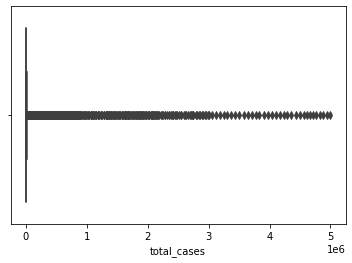

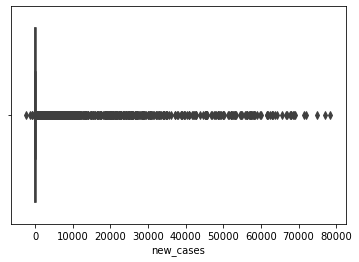

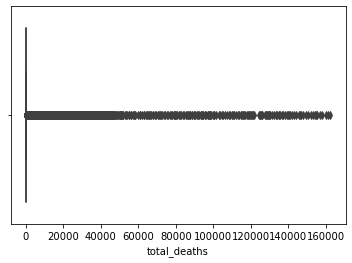

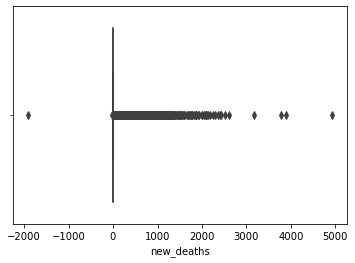

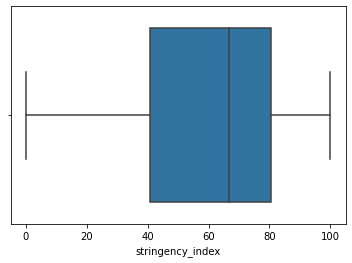

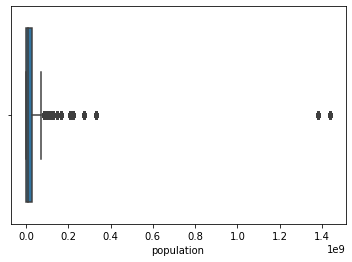

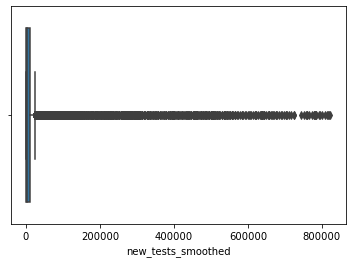

In [10]:
sns.boxplot(x=df['total_cases'])
plt.show()  
sns.boxplot(x=df['new_cases'])
plt.show()  
sns.boxplot(x=df['total_deaths'])
plt.show()  
sns.boxplot(x=df['new_deaths'])
plt.show()  
sns.boxplot(x=df['stringency_index'])
plt.show()  
sns.boxplot(x=df['population'])
plt.show()  
sns.boxplot(x=df['new_tests_smoothed'])
plt.show()

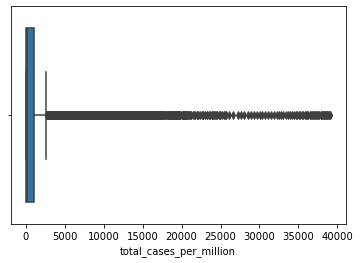

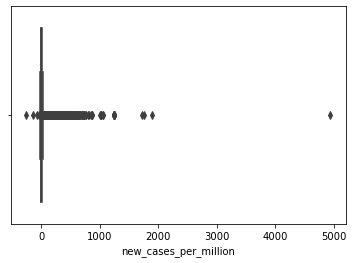

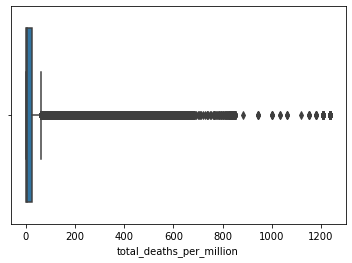

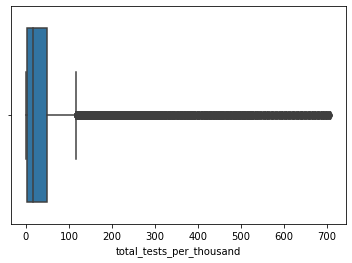

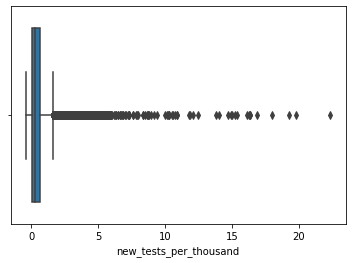

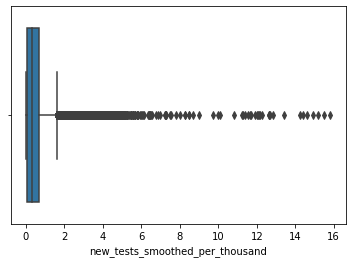

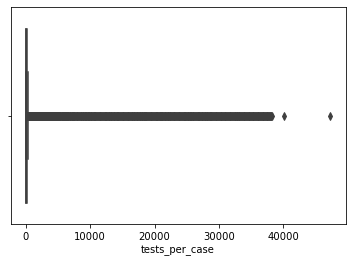

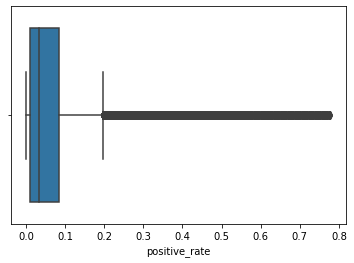

In [11]:
sns.boxplot(x=df['total_cases_per_million'])
plt.show()
sns.boxplot(x=df['new_cases_per_million'])
plt.show()
sns.boxplot(x=df['total_deaths_per_million'])
plt.show()
sns.boxplot(x=df['total_tests_per_thousand'])
plt.show()
sns.boxplot(x=df['new_tests_per_thousand'])
plt.show()
sns.boxplot(x=df['new_tests_smoothed_per_thousand'])
plt.show()
sns.boxplot(x=df['tests_per_case'])
plt.show()
sns.boxplot(x=df['positive_rate'])
plt.show()

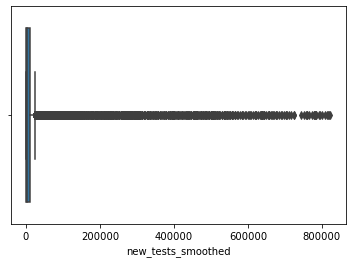

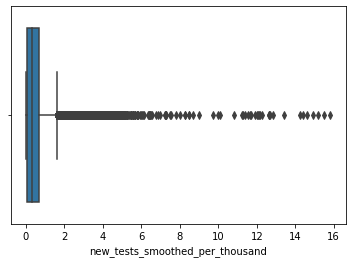

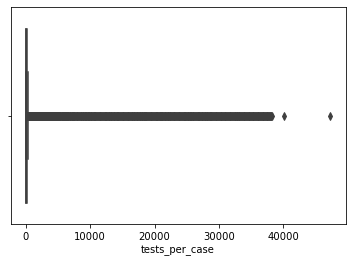

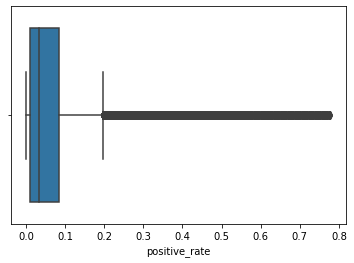

In [12]:
sns.boxplot(x=df['new_tests_smoothed'])
plt.show()
sns.boxplot(x=df['new_tests_smoothed_per_thousand'])
plt.show()
sns.boxplot(x=df['tests_per_case'])
plt.show()
sns.boxplot(x=df['positive_rate'])
plt.show()

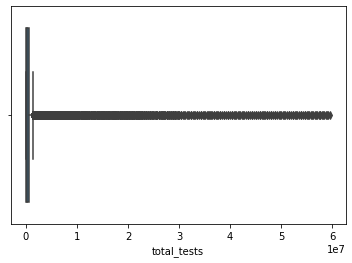

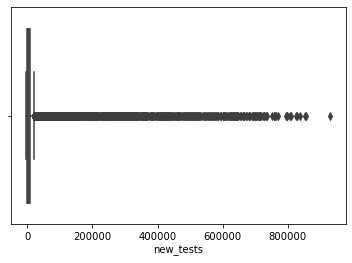

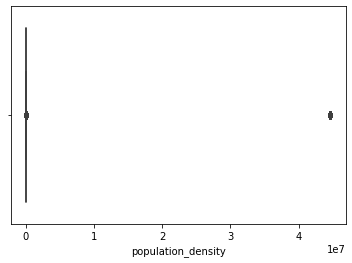

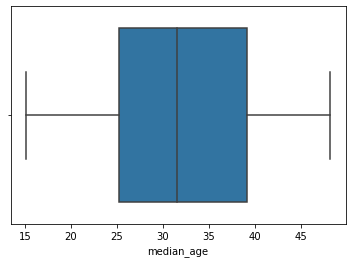

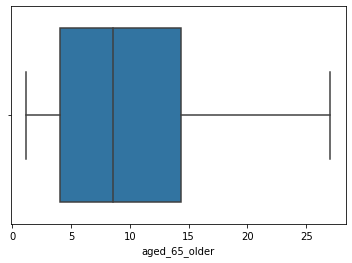

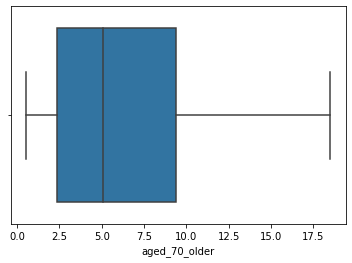

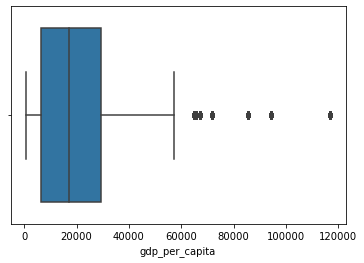

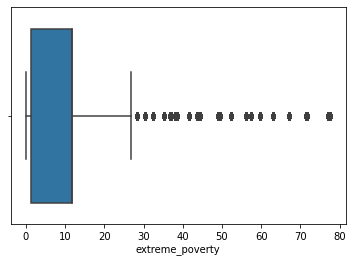

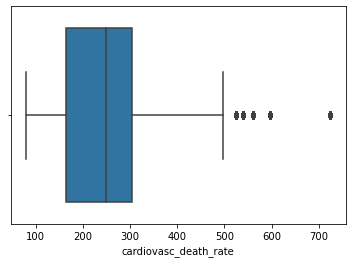

In [13]:
sns.boxplot(x=df['total_tests'])
plt.show()
sns.boxplot(x=df['new_tests'])
plt.show()
sns.boxplot(x=df['population_density'])
plt.show()
sns.boxplot(x=df['median_age'])
plt.show()
sns.boxplot(x=df['aged_65_older'])
plt.show()
sns.boxplot(x=df['aged_70_older'])
plt.show()
sns.boxplot(x=df['gdp_per_capita'])
plt.show()
sns.boxplot(x=df['extreme_poverty'])
plt.show()
sns.boxplot(x=df['cardiovasc_death_rate'])
plt.show()  

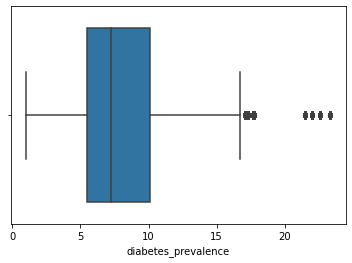

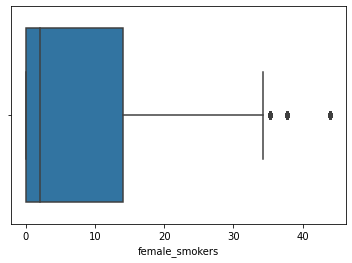

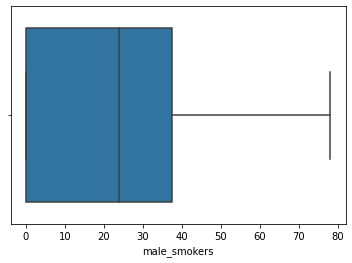

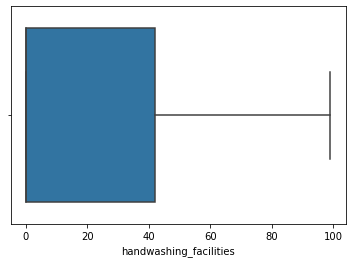

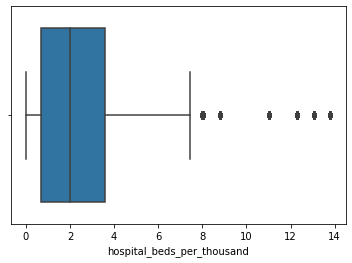

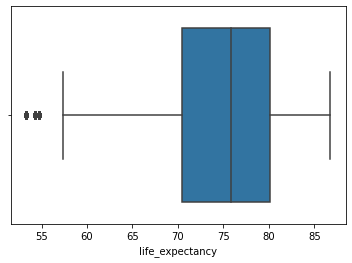

In [14]:
sns.boxplot(x=df['diabetes_prevalence'])
plt.show()
sns.boxplot(x=df['female_smokers'])
plt.show()
sns.boxplot(x=df['male_smokers'])
plt.show()
sns.boxplot(x=df['handwashing_facilities'])
plt.show()
sns.boxplot(x=df['hospital_beds_per_thousand'])
plt.show()  
sns.boxplot(x=df['life_expectancy'])
plt.show()  

In [15]:
df.shape

(35430, 35)

<font color = 'teal'>Removing outliers using the Interquartile range</font>

In [16]:
for loc in df['location'].unique():
    # Calculating the lower quartile for a location and storing in Q1
    Q1=df[df['location'] == loc].quantile(0.25)
    #calculating the upper quartile  for a locationand storing in Q3
    Q3=df[df['location'] == loc].quantile(0.75)
    #Calculating interquartile range and storing in IQR
    IQR = Q3 - Q1
    #Call the variable df and store the following calculated values(filtering the outliers from the  dataframe)
    df[df['location'] == loc] = df[df['location'] == loc][~((df[df['location'] == loc] < (Q1 - 1.5 * IQR)) |(df[df['location'] == loc]> (Q3 + 1.5 * IQR))).any(axis=1)] 

In [17]:
df = df.dropna(how = 'any')
df.shape

(26408, 35)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26408 entries, 1 to 35397
Data columns (total 35 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   continent                        26408 non-null  object 
 1   location                         26408 non-null  object 
 2   date                             26408 non-null  object 
 3   total_cases                      26408 non-null  float64
 4   new_cases                        26408 non-null  float64
 5   total_deaths                     26408 non-null  float64
 6   new_deaths                       26408 non-null  float64
 7   total_cases_per_million          26408 non-null  float64
 8   new_cases_per_million            26408 non-null  float64
 9   total_deaths_per_million         26408 non-null  float64
 10  new_deaths_per_million           26408 non-null  float64
 11  new_tests                        26408 non-null  float64
 12  total_tests       

In [19]:
df.head()

continent     location        date  total_cases  new_cases  total_deaths  \
1      Asia  Afghanistan  2020-01-01          0.0        0.0           0.0   
2      Asia  Afghanistan  2020-01-02          0.0        0.0           0.0   
3      Asia  Afghanistan  2020-01-03          0.0        0.0           0.0   
4      Asia  Afghanistan  2020-01-04          0.0        0.0           0.0   
5      Asia  Afghanistan  2020-01-05          0.0        0.0           0.0   

   new_deaths  total_cases_per_million  new_cases_per_million  \
1         0.0                      0.0                    0.0   
2         0.0                      0.0                    0.0   
3         0.0                      0.0                    0.0   
4         0.0                      0.0                    0.0   
5         0.0                      0.0                    0.0   

   total_deaths_per_million  ...  aged_70_older  gdp_per_capita  \
1                       0.0  ...          1.337        1803.987   
2                       0.0  ...          1.337        1803.987   
3                       0.0  ...          1.337        1803.987   
4                       0.0  ...          1.337        1803.987   
5                       0.0  ...          1.337        1803.987   

   extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
1        11.650195                597.029                 9.59   
2        11.650195                597.029                 9.59   
3        11.650195                597.029                 9.59   
4        11.650195                597.029                 9.59   
5        11.650195                597.029                 9.59   

   female_smokers  male_smokers  handwashing_facilities  \
1             0.0           0.0                  37.746   
2             0.0           0.0                  37.746   
3             0.0           0.0                  37.746   
4             0.0           0.0                  37.746   
5             0.0           0.0                  37.746   

   hospital_beds_per_thousand life_expectancy  
1                         0.5           64.83  
2                         0.5           64.83  
3                         0.5           64.83  
4                         0.5           64.83  
5                         0.5           64.83  

[5 rows x 35 columns]

The above image shows number of countries impacted by COVID-19 over time

<font color = 'teal'>Univariate data explorations </font>

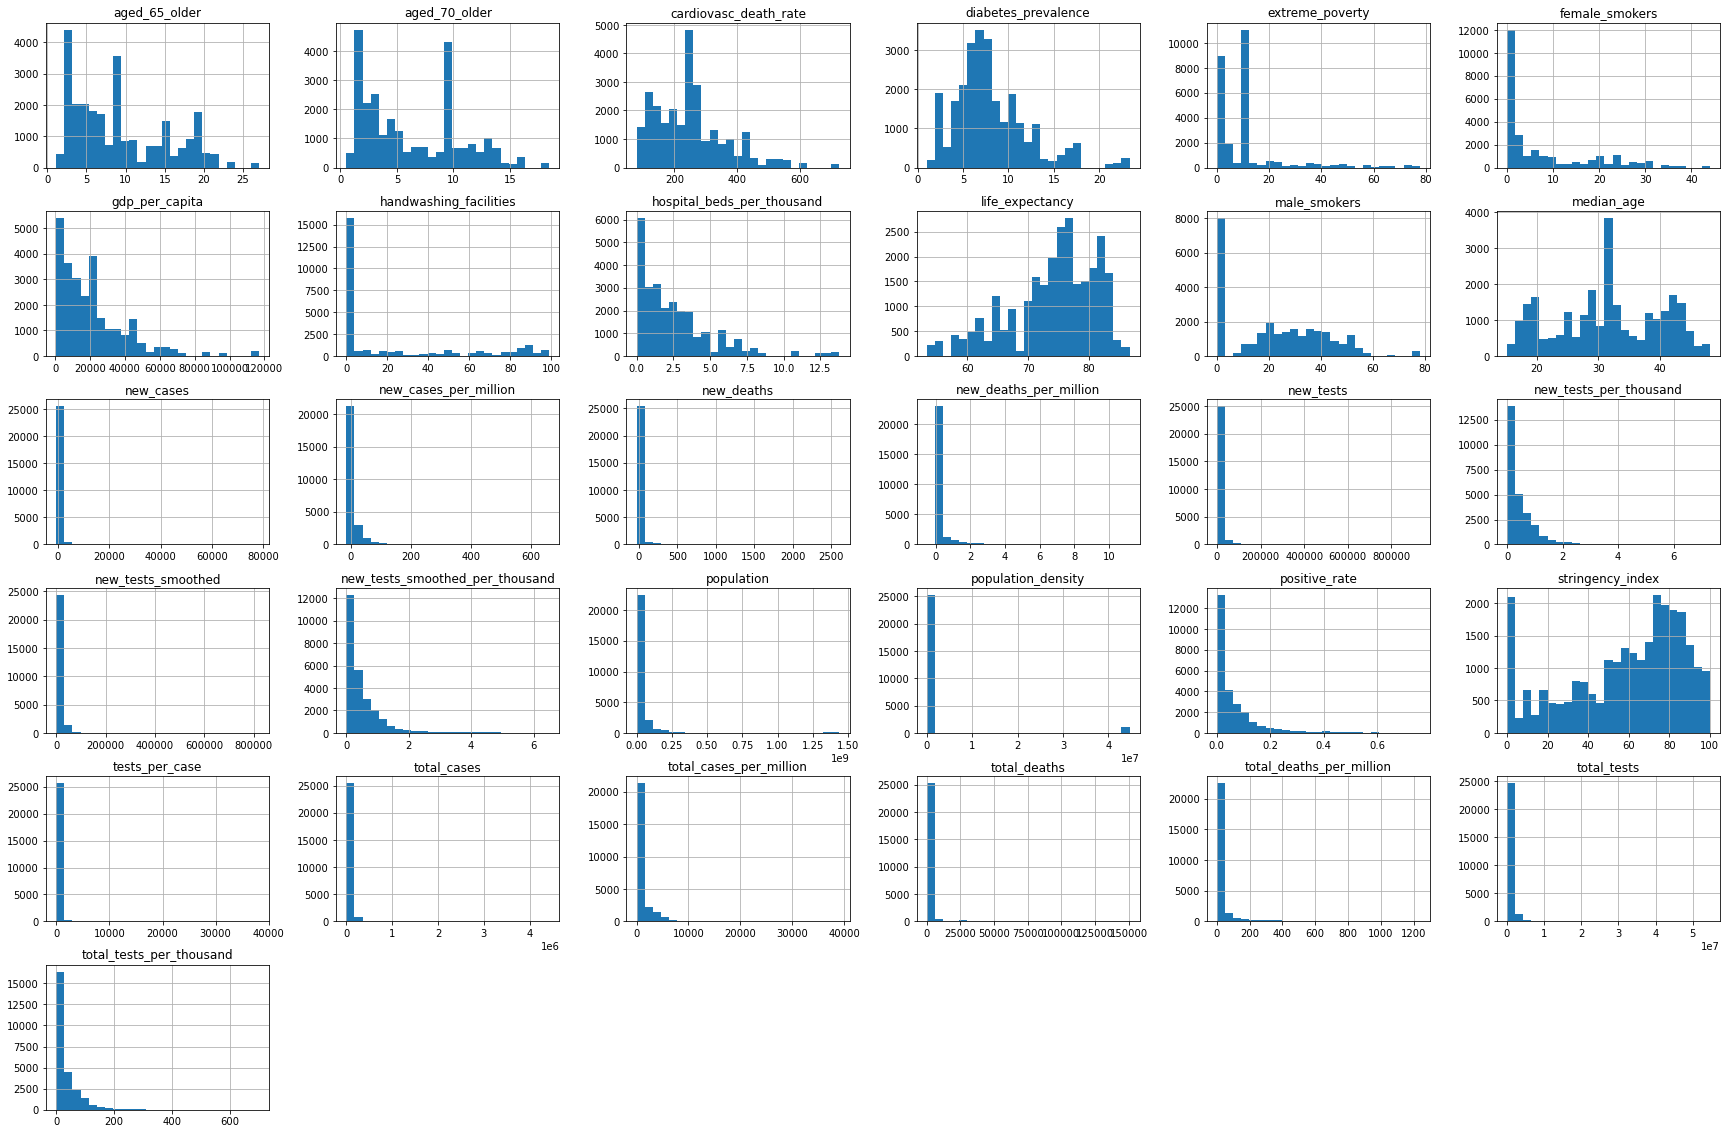

In [20]:
box=df.hist(bins=25,figsize =(30,20))
plt.show()

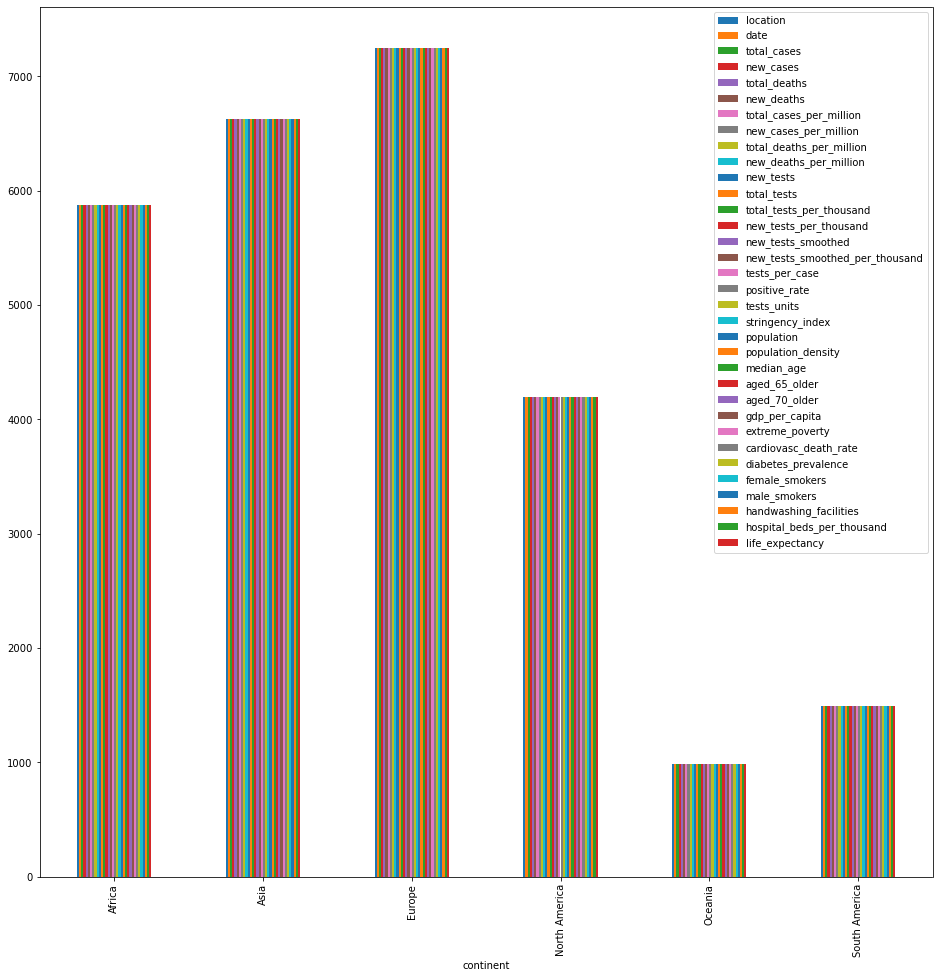

In [21]:
df.groupby('continent').count().plot(kind='bar',figsize =(16,16))

<font color ='teal'> Bivariate data explorations </font>

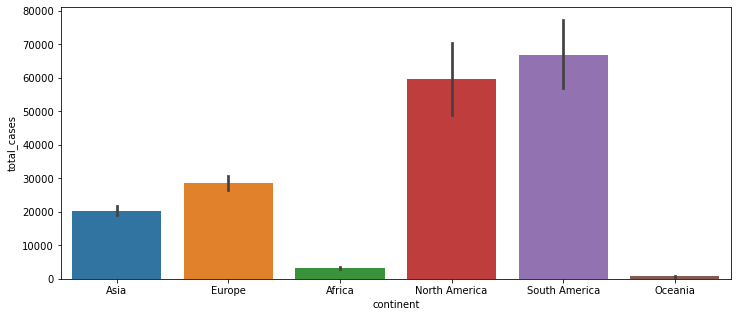

In [22]:
plt.figure(figsize=(12,5))
sns.barplot(x='continent', y='total_cases', data=df)
plt.show()

From the above scatter plot we can see that North America have more no of covid-19 cases compared to others continents and Oceania(Australia) have least count of covid-19 cases. 

In [23]:
US_Brazil = df[ (df['location']=='United States') | (df['location'] == 'Brazil')]

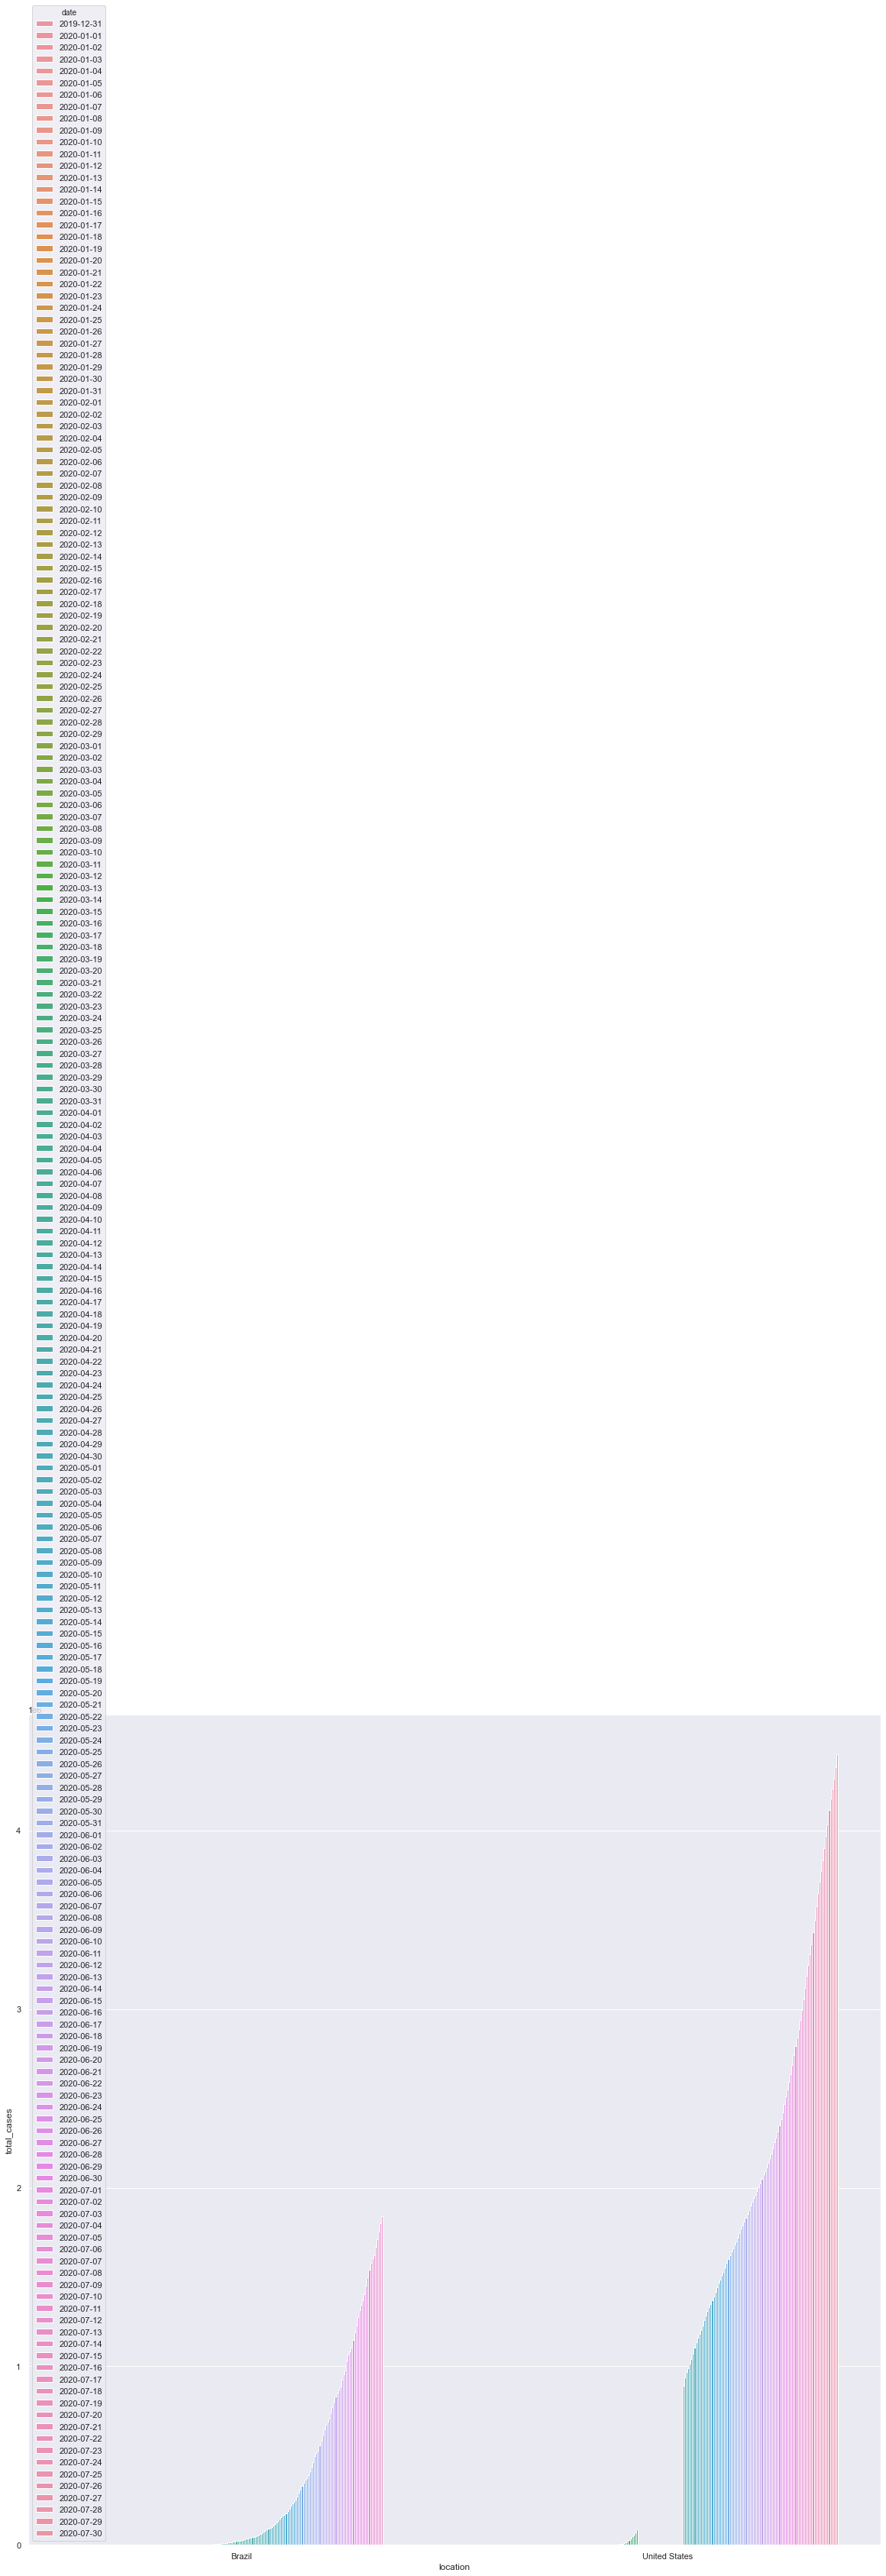

In [24]:
sns.set(rc ={"figure.figsize":(20,20)})
sns.barplot(x='location',y='total_cases',data=US_Brazil,hue ='date')
plt.show()

From the above barplot we can observe that the first confirmed cases of covid-19 in United States was reported on march month of 2020 and the count drastically increased. And first covid-19 confirmed cases in Brazil was reported on april month of 2020. Comparing to United States the count is less, though it also have drastic increase in covid-19 case count.

In [25]:
China_India = df[(df['location']=='China') | (df['location']=='India')]

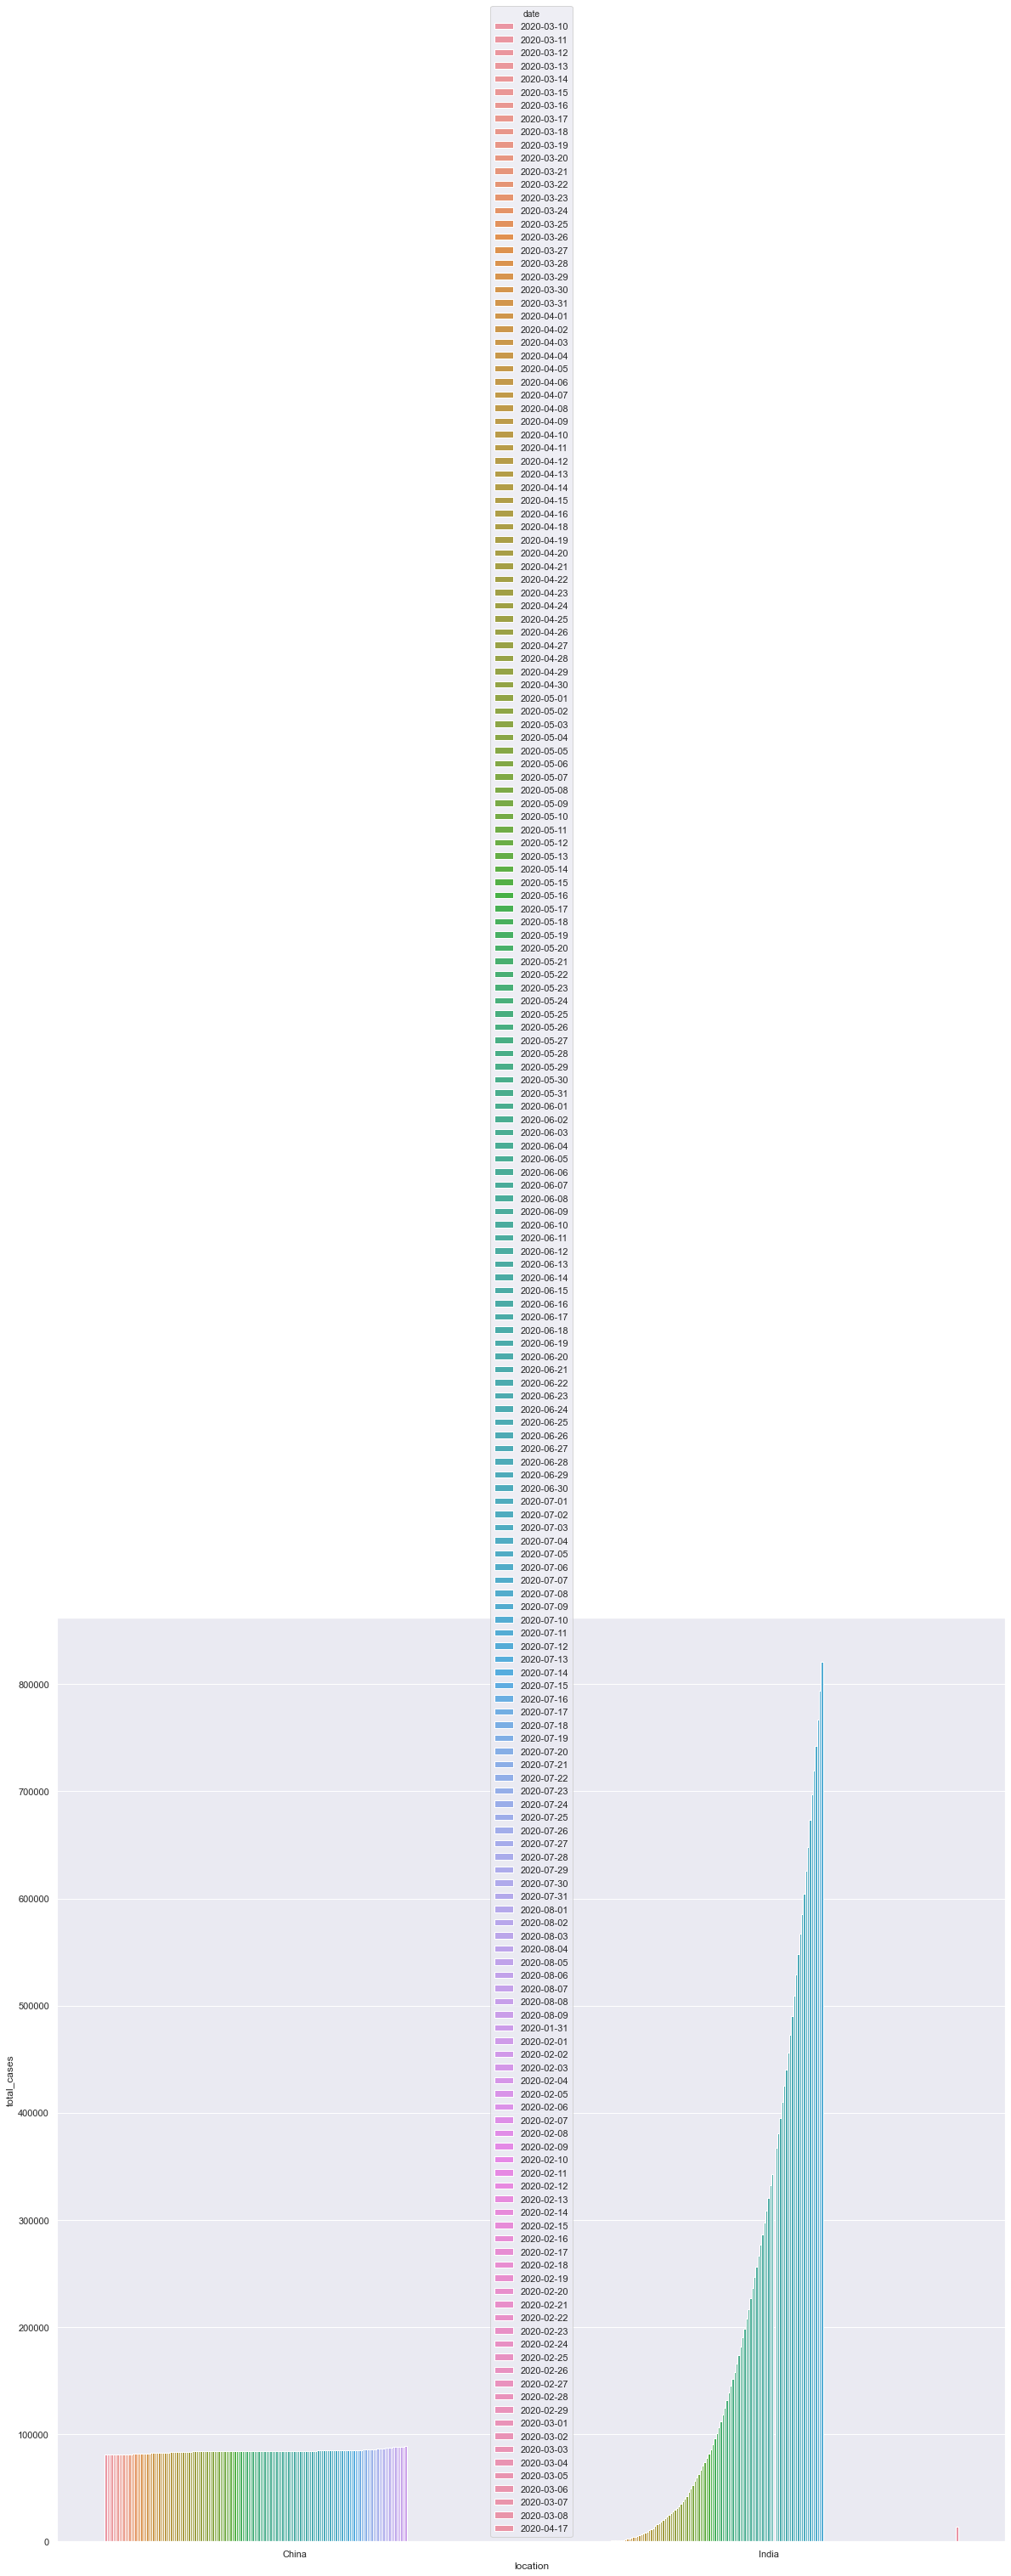

In [26]:
sns.set(rc={'figure.figsize': (20,20)})
sns.barplot(x='location',y='total_cases',data=China_India,hue ='date')
plt.show()

The outbreak was first identified in Wuhan, China, in December 2019. From the above bar plot we can observe the same. Even though it started very early in China we can observe a flattened curve. The first covid-19 case in India was reported in March,2020 and had a drastic increase in total numbers of cases when compared with China.

In [27]:
spain_germany = df[(df['location']=='Spain') | (df['location'] == 'Germany')]

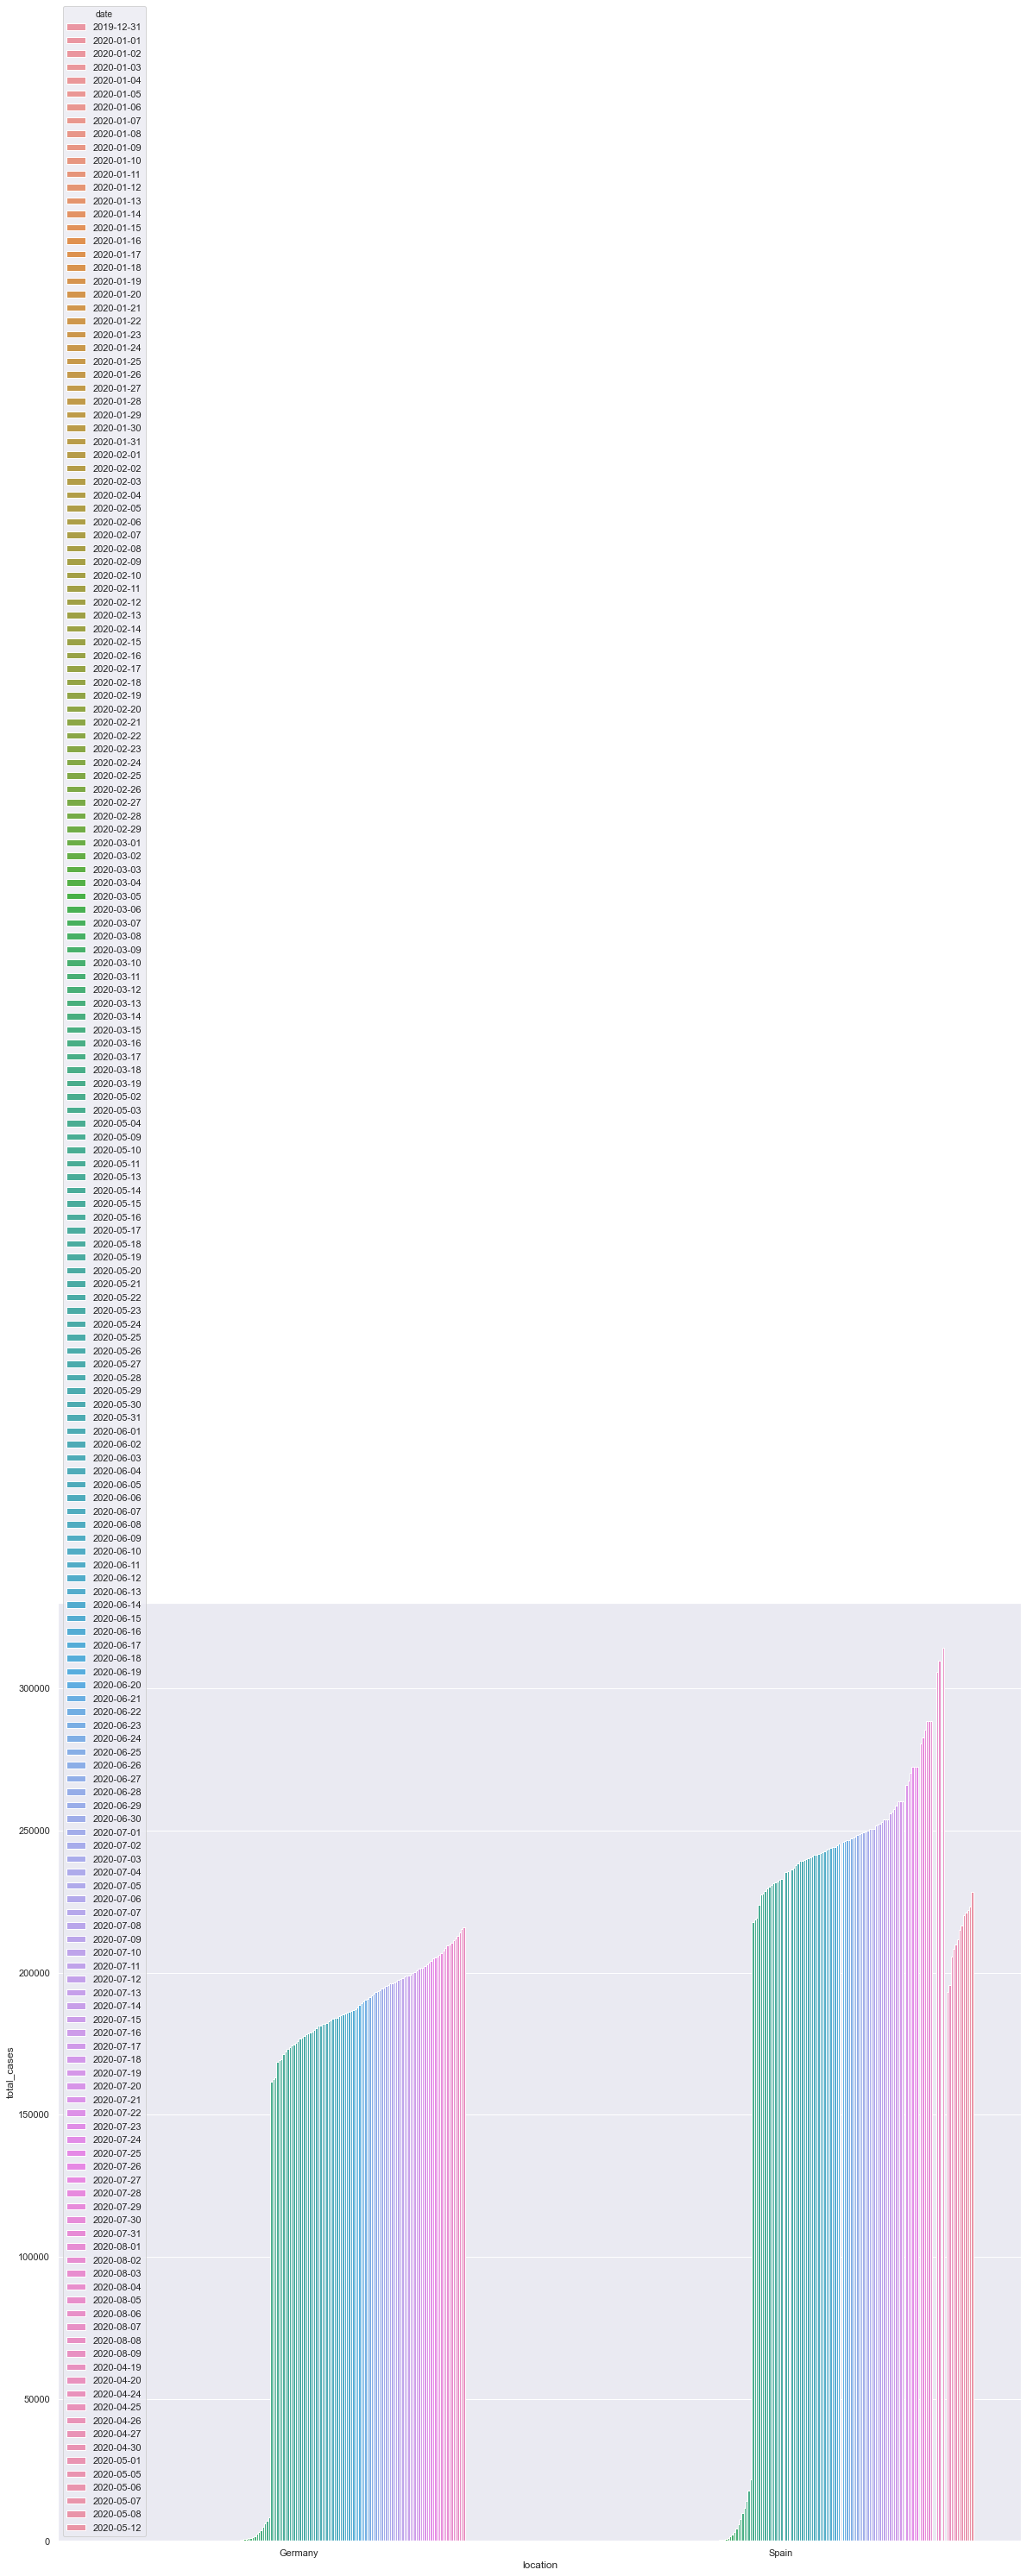

In [28]:
sns.set(rc={'figure.figsize': (20,20)})
sns.barplot(x='location',y='total_cases',data=spain_germany,hue ='date')
plt.show()

From the above barplot we can see that the first covid-19 case was almost reported around the same time both in Germany and Spain. And we can see a drastic increase in countin both countries. Spain has more cases when compared with Germany.

In [29]:
df['date'].min(), df['date'].max()

('2019-12-31', '2020-08-09')

In [30]:
#Getting latest cases
last_day_cases = df[df['date'] == '2020-08-02']

In [31]:
max_case_country = last_day_cases.sort_values(by = 'total_cases',ascending =  False)
#Printing the first 20 locations having more cases 
max_case_country[1:20]

continent              location        date  total_cases  \
25584  South America                  Peru  2020-08-02     422183.0   
33734         Europe        United Kingdom  2020-08-02     303952.0   
30175         Europe                 Spain  2020-08-02     288522.0   
16639         Europe                 Italy  2020-08-02     247832.0   
2869            Asia            Bangladesh  2020-08-02     239860.0   
12598         Europe               Germany  2020-08-02     209893.0   
6131   North America                Canada  2020-08-02     116585.0   
26476           Asia                 Qatar  2020-08-02     110911.0   
7087            Asia                 China  2020-08-02      87827.0   
9769   South America               Ecuador  2020-08-02      86232.0   
33288         Europe               Ukraine  2020-08-02      71056.0   
3460          Europe               Belgium  2020-08-02      70374.0   
3237          Europe               Belarus  2020-08-02      67946.0   
33511           Asia  United Arab Emirates  2020-08-02      60760.0   
28823           Asia             Singapore  2020-08-02      52512.0   
26122         Europe              Portugal  2020-08-02      51310.0   
31274         Europe           Switzerland  2020-08-02      35412.0   
16051         Europe               Ireland  2020-08-02      26109.0   
28321         Europe                Serbia  2020-08-02      25882.0   

       new_cases  total_deaths  new_deaths  total_cases_per_million  \
25584     7448.0       19408.0       191.0                12804.348   
33734      771.0       46193.0        74.0                 4477.388   
30175        0.0       28445.0         0.0                 6170.962   
16639      295.0       35146.0         5.0                 4098.983   
2869      2199.0        3132.0        21.0                 1456.439   
12598      240.0        9141.0         0.0                 2505.170   
6131       287.0        8941.0         6.0                 3088.986   
26476      216.0         174.0         0.0                38496.595   
7087       172.0        4667.0         6.0                   61.020   
9769       877.0        5736.0        34.0                 4887.588   
33288     1172.0        1709.0        16.0                 1624.740   
3460       291.0        9846.0         1.0                 6072.160   
3237       138.0         563.0         4.0                 7190.570   
33511      254.0         351.0         0.0                 6143.331   
28823      307.0          27.0         0.0                 8975.884   
26122      238.0        1737.0         2.0                 5032.017   
31274      342.0        1705.0         2.0                 4091.688   
16051       44.0        1763.0         0.0                 5287.582   
28321      330.0         582.0         9.0                 3803.606   

       new_cases_per_million  total_deaths_per_million  ...  aged_70_older  \
25584                225.890                   588.623  ...        4.45500   
33734                 11.357                   680.450  ...       12.52700   
30175                  0.000                   608.387  ...       13.79900   
16639                  4.879                   581.292  ...       16.24000   
2869                  13.352                    19.018  ...        3.26200   
12598                  2.865                   109.102  ...       15.95700   
6131                   7.604                   236.897  ...       10.79700   
26476                 74.972                    60.394  ...        0.61700   
7087                   0.120                     3.242  ...        5.92900   
9769                  49.708                   325.114  ...        4.45800   
33288                 26.799                    39.077  ...       11.13300   
3460                  25.109                   849.554  ...       12.84900   
3237                  14.604                    59.581  ...        9.78800   
33511                 25.681                    35.489  ...        0.52600   

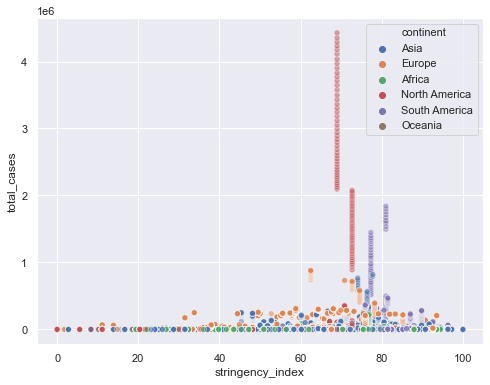

In [32]:
sns.set(rc ={'figure.figsize': (8,6)})
sns.scatterplot(x = 'stringency_index', y = 'total_cases',data = df,alpha = 0.5,color = 'g',hue = 'continent')

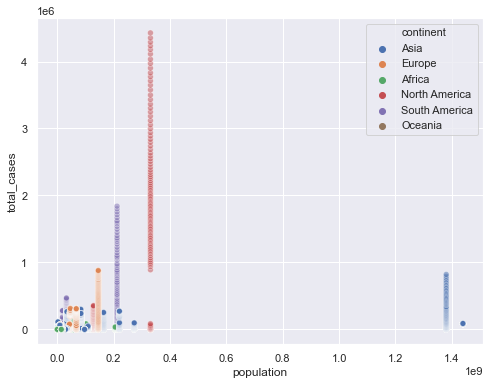

In [33]:
sns.set(rc ={'figure.figsize': (8,6)})
sns.scatterplot(x = 'population', y = 'total_cases',data = df,alpha = 0.5,color = 'g',hue = 'continent')

Although the population is very high in Asia when compared with North America and South America the total number of covid-19 cases is more in North America and South America  despite its population.

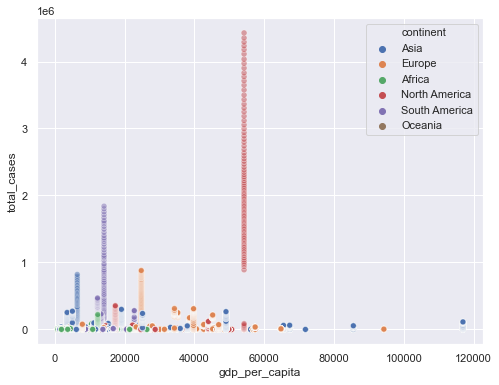

In [34]:
sns.set(rc ={'figure.figsize': (8,6)})
sns.scatterplot(x = 'gdp_per_capita', y = 'total_cases',data = df,alpha = 0.5,color = 'g',hue = 'continent')

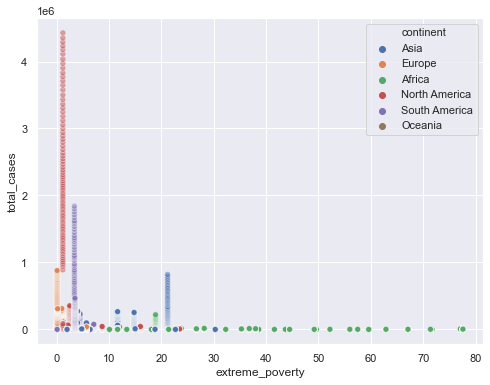

In [35]:
sns.set(rc ={'figure.figsize': (8,6)})
sns.scatterplot(x = 'extreme_poverty', y = 'total_cases',data = df,alpha = 0.5,color = 'g',hue = 'continent')

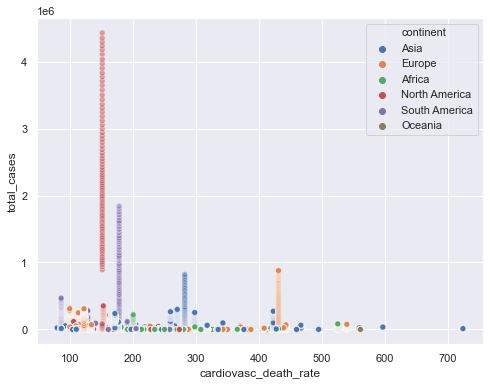

In [36]:
sns.set(rc ={'figure.figsize': (8,6)})
sns.scatterplot(x = 'cardiovasc_death_rate', y = 'total_cases',data = df,alpha = 0.5,color = 'g',hue = 'continent')

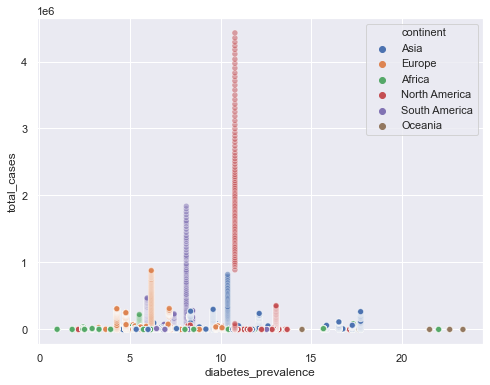

In [37]:
sns.set(rc ={'figure.figsize': (8,6)})
sns.scatterplot(x = 'diabetes_prevalence', y = 'total_cases',data = df,alpha = 0.5,color = 'g',hue = 'continent')

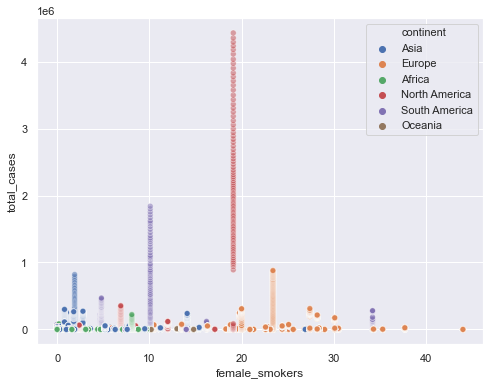

In [38]:
sns.scatterplot(x = 'female_smokers', y ='total_cases' ,data = df,alpha = 0.5,color = 'g',hue = 'continent')

From the above graph we can observe that Europe have more smoking female population comparing to other countries, but still manages the covid-19 count. 

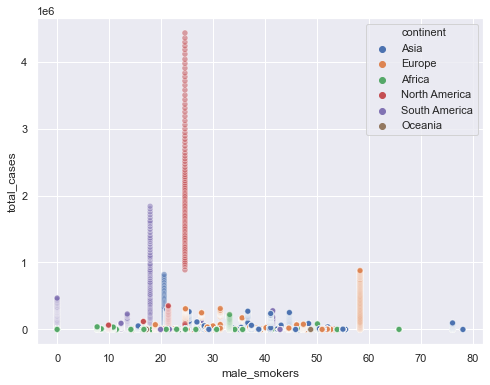

In [39]:
sns.scatterplot(x = 'male_smokers', y ='total_cases' ,data = df,alpha = 0.5,color = 'g',hue = 'continent')

The graph is slighly similar to the previous graph (total_cases vs femole smokers). But cities of Asia, Europe  and Africa also have more smoking male population.

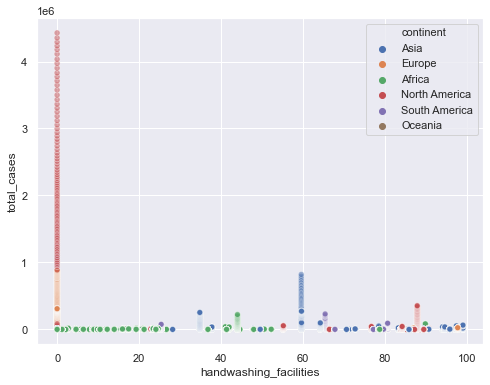

In [40]:
sns.scatterplot(x = 'handwashing_facilities', y ='total_cases' ,data = df,alpha = 0.5,color = 'g',hue = 'continent')

Eventhough the handwashing facilities are very less in Africa the number of cases are very rare in Africa compared to other developed nations.

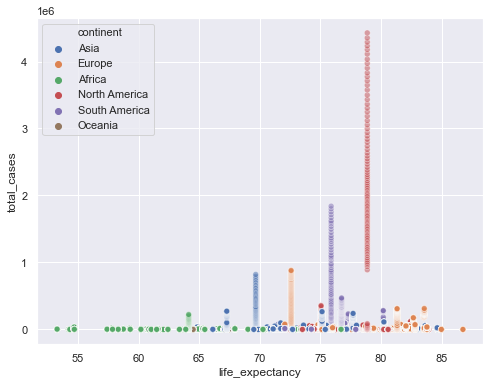

In [41]:
sns.scatterplot(x = 'life_expectancy', y ='total_cases' ,data = df,alpha = 0.5,color = 'g',hue = 'continent')

In [42]:
cf.go_offline() # required to use plotly offline (no account required).
py.init_notebook_mode() # graphs charts inline (IPython).

In [43]:
df.date = pd.to_datetime(df.date)
df.date.sort_values().index
df_by_date = df.loc[df.date.sort_values().index]

In [44]:
Cases_by_date = df_by_date.groupby('date')['total_cases'].sum()
Cases_by_date.iplot(kind='bar', title='total cases per day')

View this above plot in your browser at https://plotly.com/~umamohan/6

In [45]:
Deaths_by_date = df_by_date.groupby('date')['total_deaths'].sum()
Deaths_by_date.iplot(kind='bar', title='Deaths per day')

View this above plot in your browser at https://plotly.com/~umamohan/8

In [46]:
Cases_deaths = pd.DataFrame({'Total_Cases':Cases_by_date, 'Total_deaths':Deaths_by_date })

color1 = '#9467bd'
color2 = '#F08B00'

trace1 = go.Scatter(
    x = Cases_deaths.index,
    y = Cases_deaths['Total_Cases'],
    name='Total_Cases',
    line = dict(
        color = color1
    )
)
trace2 = go.Scatter(
    x= Cases_deaths.index,
    y =Cases_deaths['Total_deaths'] ,
    name='Total_deaths',
    yaxis='y2',
    mode='markers'

)
data = [trace1, trace2]
layout = go.Layout(
    title= "Total Cases and Deaths per day",
    yaxis=dict(
        title='Total_cases',
        titlefont=dict(
            color=color1
        ),
        tickfont=dict(
            color=color1
        )
    ),
    yaxis2=dict(
        title='Total deaths',
        overlaying='y',
        side='right',
        titlefont=dict(
            color=color2
        ),
        tickfont=dict(
            color=color2
        )

    )

)
fig = go.Figure(data=data, layout=layout)
plot_url = py.iplot(fig)

In [47]:
Cases_by_date = df_by_date.groupby('location')['total_cases'].sum()
Cases_by_date.iplot(kind='bar', title='COVID-19 count in all countries')

View this above plot in your browser at https://plotly.com/~umamohan/4/

From the above plot we can observe as of now United States has more count and both Brazil and Russia is in second position in covid-19 case count 

In [48]:
countries = list(df.location.unique())

In [50]:
fig = px.line(df, x='date', y='total_cases', color='location',width=1000, height=700)
py.iplot(fig,title='Covid-19 Cases all over the world')
Cases_by_date.iplot(kind='bar', title='COVID-19 count in all countries')

<font color ='teal'>Pandas Profiling <font>

In [ ]:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="covid_pandas_profiling.html")

# Explore Data Relationships

<font color = 'teal'> Create pairplots for the dataframe to explore the data relationships </font>

Pair plot allows us to see both distribution of single variables and relationships between two variables. Pair plots are a great method to identify trends. Create pairplot for the dataframe df using sns.pairplot().

In [ ]:
df_PairPlot=sns.pairplot(df)

# Feature Selection

<font color = 'teal'>Create a heatmap to find the correlations between the features of the dataframe df</font>

In [ ]:
#Lets plot the heatmap to find correlation among the features
sns.set(rc={'figure.figsize': (50,30)})
corr = df.corr()
sns.heatmap(corr,square = True)

In [ ]:
#Step 1. Call the variable corr_matrix
corr_matrix = df.drop(['total_cases','new_cases','total_deaths','new_deaths'], axis=1).corr().abs()

#Step 2.the following code is to get the upper triangle of the correlation matrix 
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

#Step 3. This code iterates through our columns and gets the index of any that have a correlation > 0.95
#Call the variable to_drop and store the column that are more than 90% correlated for removal.
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

In [ ]:
#Priting the column names which are 90% correlated for removal 
print('Features selected to drop is ',to_drop)

In [ ]:
#Now drop the columns from the datafram df which are more than 90% correlated for removal
df = df.drop(df[to_drop],axis=1)

In [ ]:
df.shape

In [ ]:
df.to_csv("step_3_output.csv")